

**The dataset structure**: the dataset consists of recordings of spoken digits in **.wav** files at $8$kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends. There are $6$ different speakers who pronounce each digit from $0$ to $9$ for $50$ times. Each audio file has a name of the form $\left\{digit\right\}\_\left\{speaker\,\,name\right\}\_\left\{attempt\,\,number\right\}.wav$. The data is split into training and validation sets with the ratio $80:20$.

There are many ways of representing/visualising the audio data and here in the project we will work with a spectral characteristic known as mel-frequency cepstral coefficients (MFCC) (see [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) for details). As we will see later this can be treated as an pixel image.

We begin by loading the Audio MNIST training dataset that is taken from this [source](https://github.com/Jakobovski/free-spoken-digit-dataset):

In [45]:
#importing libraries
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.io import wavfile

In [46]:
audio_mnist_training_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_mfccs.txt')
audio_mnist_training_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_labels.txt').reshape(-1, 1)

**Remark:** The corresponding data folder contains two types of data:
- raw audio files (folder Audio)
- audio files Mel-frequency cepstral coefficients (folder MFCC) saved in txt file

In the above we use Mel-frequency cepstral coefficients as the data representation of audio. 

Below we take a random element of a training data and demonstrate how the MFCC can be visualised.

The Audio MNIST training set contains 2400 samples with 900 MFC coefficients each.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

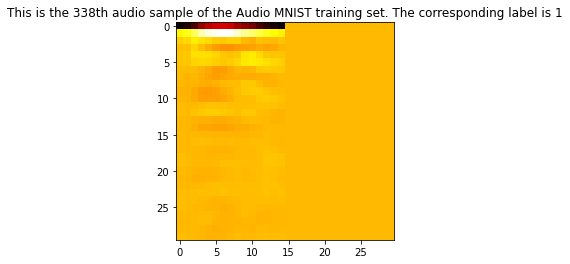

In [5]:
print("The Audio MNIST training set contains {s} samples with {p} MFC coefficients each.".format(s = audio_mnist_training_mfccs.shape[0], \
        p = audio_mnist_training_mfccs.shape[1]))

item_number = np.random.randint(low=0, high=2400)

plt.imshow(audio_mnist_training_mfccs[item_number].reshape(30, 30), cmap='hot')
plt.title("This is the {n}th audio sample of the Audio MNIST training set. The corresponding label is {l}".format( \
            n= item_number, l=int(audio_mnist_training_labels[item_number][0])))
plt.tight_layout

In [47]:
ipd.Audio('AudioMNIST/Audio/Training/0_lucas_46.wav')

In [48]:
ipd.Audio( 'AudioMNIST/Audio/Training/1_nicolas_46.wav')

In [49]:
ipd.Audio('AudioMNIST/Audio/Training/5_theo_46.wav')

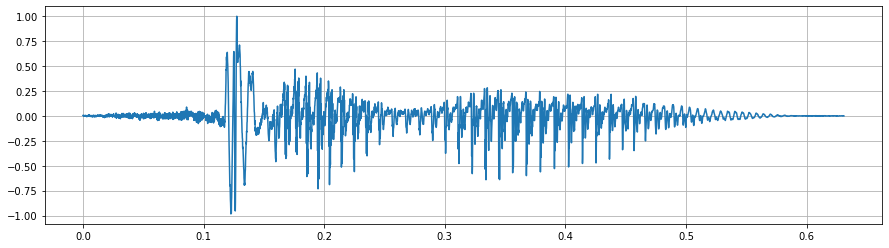

In [9]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

sample_rate, audio = wavfile.read('AudioMNIST/Audio/Training/0_lucas_46.wav')

audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

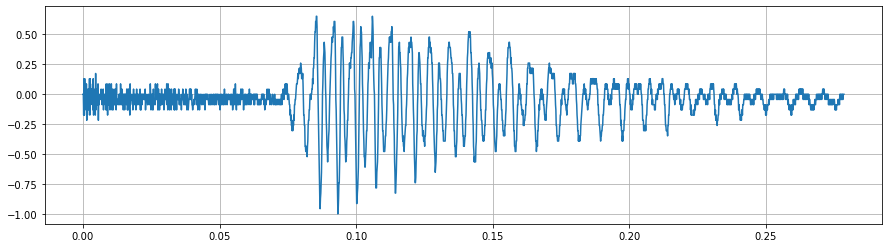

In [10]:
sample_rate, audio = wavfile.read('AudioMNIST/Audio/Training/2_nicolas_46.wav')

audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

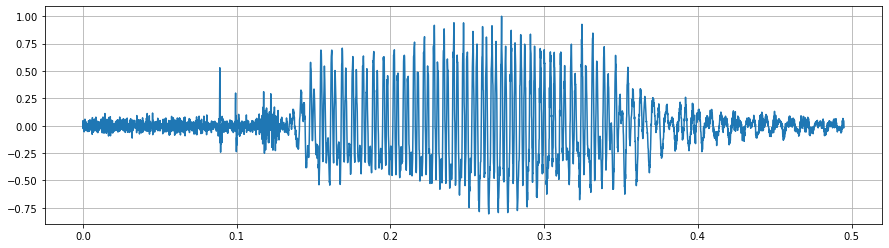

In [11]:
sample_rate, audio = wavfile.read('AudioMNIST/Audio/Training/3_theo_46.wav')

audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

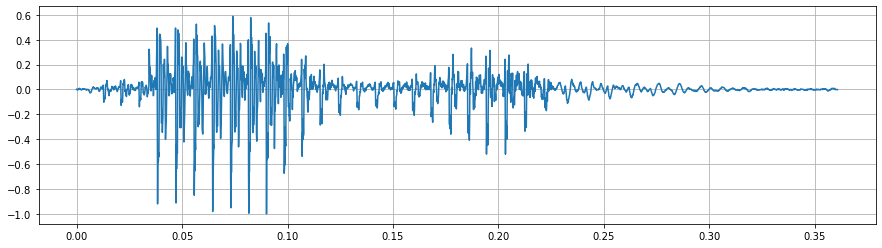

In [12]:
sample_rate, audio = wavfile.read('AudioMNIST/Audio/Training/7_yweweler_22.wav')

audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

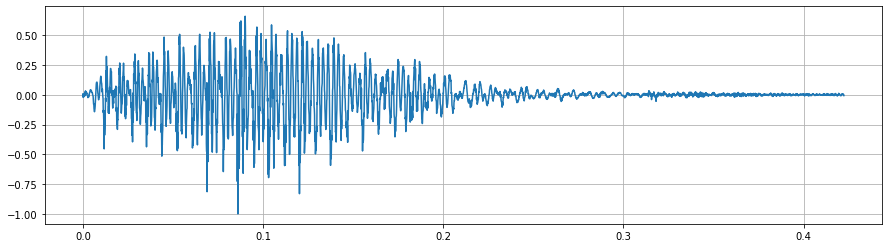

In [13]:
sample_rate, audio = wavfile.read('AudioMNIST/Audio/Training/8_jackson_42.wav')

audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [14]:
def linear_regression_data(data_inputs):
    # YOUR CODE HERE
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column,data_inputs]
    return X_matrix

In [15]:
def standardise(data_matrix):
    # YOUR CODE HERE
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

In [16]:
# standardising and convering the training data in to regression data
audio_data_inputs, audio_row_of_means, audio_row_of_stds = standardise(audio_mnist_training_mfccs)
audio_data_matrix = linear_regression_data(audio_data_inputs)

In [17]:
def one_hot_vector_encoding(labels):   
    
    # YOUR CODE HERE
    
    
    no_of_classes = np.max(labels) + 1
    
    output = np.zeros((len(labels), no_of_classes))
    
    output[np.arange(len(labels)), labels] = 1
    
    return output

In [18]:
audio_mnist_training_labels = audio_mnist_training_labels.reshape(-1).astype(int)
audio_OHV = one_hot_vector_encoding(audio_mnist_training_labels)

In [19]:
def model_function(data_matrix, weight_matrix):
    # YOUR CODE HERE
    return data_matrix @ weight_matrix

In [20]:
def multinomial_prediction_function(data_matrix, weight_matrix):    
    # YOUR CODE HERE
    return np.argmax(model_function(data_matrix, weight_matrix), axis=1) #row wise maximum index

In [21]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings):    
    # YOUR CODE HERE
    model_evaluation = model_function(data_matrix, weight_matrix)
    return np.sum(np.log(np.sum(np.exp(model_evaluation), axis=1)) - np.sum(one_hot_vector_encodings *model_evaluation, axis=1))

In [22]:
def multinomial_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings):    
    # YOUR CODE HERE
    model_evaluation = model_function(data_matrix, weight_matrix)
    return data_matrix.T @ (softmax_function(model_evaluation, axis=1) - one_hot_vector_encodings)

In [23]:
def softmax_function(argument, axis=None):    
    # YOUR CODE HERE
    if axis == None:
        output = np.exp(argument - np.max(argument))
        output = output / np.sum(output)
    else:
        output = np.exp(argument - np.expand_dims(np.max(argument, axis), axis))
        output = output / np.expand_dims(np.sum(output, axis), axis)
    return output

In [24]:
def gradient_descent(objective,
                     gradient,
                     initial_weights,
                     step_size=1,
                     no_of_iterations=100,
                     print_output=10):
    # YOUR CODE HERE
    weights =initial_weights
    objective_values = []
    objective_values.append(objective(weights))
    for i in range(no_of_iterations):
      
        weights -= (step_size* gradient(weights))
        objective_values.append(objective(weights))
        
        if (i+1) % print_output == 0:
            print("At ",i+1,"iteration value of objective function is: " , objective_values[i])
    return weights, objective_values

In [25]:
def classification_accuracy(estimated_labels, true_labels):
    # YOUR CODE HERE
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

### 1.  mulnomial logistic regression classification model using Gradient Decent

In [26]:
audio_objective = lambda weights: multinomial_logistic_regression_cost_function(audio_data_matrix, weights, audio_OHV)

audio_gradient = lambda weights: multinomial_logistic_regression_gradient(audio_data_matrix, weights, audio_OHV)

audio_step_size = 3.9/(np.linalg.norm(audio_data_matrix))**2

initial_weight_matrix = np.zeros((audio_data_matrix.shape[1], audio_OHV.shape[1]))

audio_optimal_weights,audio_objective_values =gradient_descent(audio_objective,audio_gradient,initial_weight_matrix, 
                                                               audio_step_size,no_of_iterations=5000,print_output=1000)
audio_accuracy_rate =classification_accuracy(multinomial_prediction_function(audio_data_matrix,audio_optimal_weights)
                                             ,audio_mnist_training_labels)

At  1000 iteration value of objective function is:  454.2979094294481
At  2000 iteration value of objective function is:  287.2082008750173
At  3000 iteration value of objective function is:  217.5317493559777
At  4000 iteration value of objective function is:  177.65860255561455
At  5000 iteration value of objective function is:  151.31060707815132


In [38]:
print("The mulnomial logistic regression using gradient descent, successfully classified {acc:2.2f} % of Training data."
      .format(acc = 100*audio_accuracy_rate))

The mulnomial logistic regression using gradient descent, successfully classified 99.38 % of Training data.


#### Validating the model on Test data:

In [29]:
audio_mnist_testing_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/testing/testing_mfccs.txt')
audio_mnist_testing_labels = np.genfromtxt(
    'AudioMNIST/MFCC/testing/testing_labels.txt').reshape(-1, 1)

audio_mnist_testing_labels = audio_mnist_testing_labels.reshape(-1).astype(int)

In [37]:
audio_data_testing, audio_row_of_means, audio_row_of_stds = standardise(audio_mnist_testing_mfccs)
audio_data_testing = linear_regression_data(audio_data_testing)

audio_accuracy_rate_testing = classification_accuracy(multinomial_prediction_function(audio_data_testing, audio_optimal_weights)
                                             ,audio_mnist_testing_labels)

print("The mulnomial logistic regression using gradient descent successfully classified {acc:2.2f} % of Test data."
      .format(acc = 100*audio_accuracy_rate_testing))

The mulnomial logistic regression using gradient descent successfully classified 95.33 % of Test data.


### 2.  mulnomial logistic regression classification model using proximal gradient decent:


In [31]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)

In [32]:
def lasso_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings,
                                            regularisation_parameter):
    # YOUR CODE HERE
    #raise NotImplementedError()
    return multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings)+regularisation_parameter * np.sum(np.abs(weight_matrix))




In [33]:
def proximal_gradient_descent(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=1000,
                              print_output=100):
    # YOUR CODE HERE
    #raise NotImplementedError()
    weights =initial_weights
   
    l = []
    for i in range(no_of_iterations):
      
        weights = proximal_map(weights - (step_size* gradient(weights)))
        l.append(objective(weights))
        
        if (i+1) % print_output == 0:
            print("At", i+1, "iteration, value of obejective function is: " ,  l[i])

    return weights, l      
    

In [42]:
LASSO_regularisation_parameter = 1e-2

audio_step_size = 3.9/(np.linalg.norm(audio_data_matrix))**2

audio_threshold = LASSO_regularisation_parameter * audio_step_size 

audio_objective = lambda weights: lasso_logistic_regression_cost_function(audio_data_matrix, weights, audio_OHV, 
                                                                          LASSO_regularisation_parameter)

audio_gradient = lambda weights: multinomial_logistic_regression_gradient(audio_data_matrix, weights, audio_OHV)

audio_proximal_map = lambda weights : soft_thresholding(weights, audio_threshold)

initial_weight_matrix = np.zeros((audio_data_matrix.shape[1], audio_OHV.shape[1]))

audio_proximal_weights, audio_lasso_objective_values = proximal_gradient_descent(
    audio_objective,audio_gradient,audio_proximal_map,initial_weight_matrix, audio_step_size, 5000, 1000)

At 1000 iteration, value of obejective function is:  455.6688539601947
At 2000 iteration, value of obejective function is:  289.1482445147368
At 3000 iteration, value of obejective function is:  219.75692948599024
At 4000 iteration, value of obejective function is:  180.08343234796368
At 5000 iteration, value of obejective function is:  153.89210427114955


In [44]:
proximal_accuracy_rate = classification_accuracy(multinomial_prediction_function(
    audio_data_matrix, audio_proximal_weights) ,audio_mnist_training_labels)

print("Classification accuracy for multinomial lass logistic regression using proximal gradient descent is {acc:2.2f} % same as gradient decent."
      .format(acc = 100*proximal_accuracy_rate))

Classification accuracy for multinomial lass logistic regression using proximal gradient descent is 99.38 % same as gradient decent.


#### Validating the model on test data

In [39]:
audio_data_testing, audio_row_of_means, audio_row_of_stds = standardise(audio_mnist_testing_mfccs)
audio_data_testing = linear_regression_data(audio_data_testing)

audio_accuracy_rate_testing = classification_accuracy(multinomial_prediction_function(audio_data_testing, audio_proximal_weights)
                                             ,audio_mnist_testing_labels)

print("The multinomial lasso logistic regression using proximal gradient descent successfully classified {acc:2.2f} % of Test data."
      .format(acc = 100*audio_accuracy_rate_testing))

The multinomial lasso logistic regression using proximal gradient descent successfully classified 95.33 % of Test data.


The code for best data model (linear, polynomial or else) applied to best weights
and assign the result to the output of the function $\mathtt{MNIST\_model\_function}$. The data model has to be created from the argument *inputs*, which is a two-dimensional array where the first dimension equals the number of samples and the second dimension the dimension of the data (900 in case of Audio MNIST). If, for example, your model is a linear basis model applied to a weight matrix *best_weight_matrix*, then your code could look like:

```
def MNIST_model_function(inputs):
    return linear_regression_data(inputs) @ best_weight_matrix
```


In [50]:



def MNIST_model_function(inputs):
    # YOUR CODE HERE
    data_matrix_input, audio_row_of_means, audio_row_of_stds = standardise(inputs)
    labels = linear_regression_data(data_matrix_input) @ audio_optimal_weights
    return np.argmax( labels, axis=1) #row wise maximum index
  

The code in the next cell will then evaluate the classification performance of your best classifier
when applied to hidden data that is similar (but different) to the MNIST training dataset.

In [51]:
# YOUR CODE HERE
audio_accuracy_rate_testing = classification_accuracy(MNIST_model_function(audio_mnist_testing_mfccs)
                                             ,audio_mnist_testing_labels)

print("The mulnomial logistic regression successfully classified {acc:2.2f} % of Test data."
      .format(acc = 100*audio_accuracy_rate_testing))

The mulnomial logistic regression successfully classified 95.33 % of Test data.


### The End.